# *Aufgabe: Gradientenverfahren*

0. Importieren Sie alle die nötigen Bibliotheken.

In [7]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from matplotlib import cm


1. Kopieren und visualisieren (am besten mit scatter) Sie die Daten:

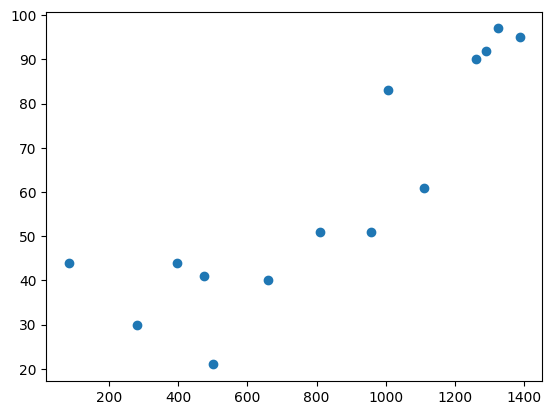

In [8]:
studying = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
result = np.array([44,97,30,51,95,51,44,41,21,40,90,83,61,92])

plt.scatter(studying, result)
plt.show()


2. Implementieren Sie das Gradientenverfahren für die Regressionsaufgabe. Es ist ausreichend, lineare Regression zu betrachten. 

In [11]:
def sse(y_pred, y):
    return np.sum((y_pred-y)**2)

# Initialwerte
w = 1
b = 10
# Anzahl der Epochen:
epochs = 1000
# Learning rate:
lr_w = 0.00000001
lr_b = 0.001

error = []
for _ in range(epochs):
    predicted = w * studying + b
    error.append(sse(predicted, result)) # Fehler für die spätere Visualisierung
    gradient_w = 2 * np.dot(studying, predicted - result)
    gradient_b = 2 * np.sum(predicted - result)
    # das alte Gewicht w
    w = w - lr_w * gradient_w
    b = b - lr_b * gradient_b


print("Lineares Modell: result = {} * studying + {}. Error: {}".format(w, b, error[-1]))


Lineares Modell: result = 0.05382241720542948 * studying + 15.544336342262378. Error: 2138.2721853540347


3. Visualisieren Sie den Fehler: 

In [ ]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(range(epochs), error)
ax.set_yscale('log')


In [ ]:
x = np.linspace(0, 1400)
y = w * x + b

plt.scatter(studying, result)
plt.plot(x, y)

plt.show()


Zusatzaufgabe 1. Implementieren Sie ein Momentum für Ihr Gradientenverfahren

In [ ]:
w = 1
b = 10

momentum_w = 0.2
momentum_b = 0.5
velocity_w = 0.3
velocity_b = 10
epochs = 1000

error = []
# Mehrere Epochen trainieren
for _ in range(epochs):
    predicted = w * studying + b

    error.append(sse(predicted, result))

    gradient_w = 2 * np.dot(studying, predicted - result)
    gradient_b = 2 * np.sum(predicted - result)
    velocity_w = momentum_w * velocity_w - lr_w * gradient_w
    w += velocity_w
    velocity_b = momentum_b * velocity_b - lr_b * gradient_b
    b += velocity_b

print("Lineares Modell: result = {} * studying + {}. Fehler: {}".format(w, b, error[-1]))

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ax.plot(range(epochs), error)
ax.set_yscale('log')


Zusatzaufgabe 2: Wiederholen Sie den Schritt 2 für die Logistische Regression. 

In [ ]:
def logloss(y_pred, y):
    return -np.mean(y * (np.log(y_pred)) + (1 - y) * np.log(1 - y_pred))

def sigmoid(z):
    return 1.0 / ( 1.0 + np.exp(-z))

def softmax(z):
    return np.exp(z)/sum(np.exp(z))

def predict(x, w, b):
    return np.clip(sigmoid(np.dot(x,w)+b), 0.0000001, 0.999999)

def plot_original_data(ax, x, y):
    ax.scatter(x[np.argwhere(y>=50)].ravel(),y[np.argwhere(y>=50)].ravel(),c="green",label="Bestanden")
    ax.scatter(x[np.argwhere(y<50)].ravel(),y[np.argwhere(y<50)].ravel(),c="red",label="Nicht bestanden")

def gradient(x,y,prediction):
    m = x.shape[0]
    dw = 1/m*np.sum(np.dot(x.T, (prediction - y)))
    db = 1/m*np.sum((prediction - y))
    return dw,db



In [ ]:
# Hier benutzen wir neue Daten, di wir selbst "basteln":
x = np.random.randint(0,1400,50)
y = x*0.053+16  # Das ist die bekannte Lösung
y += np.random.normal(-5,5,50)  # Plus ein bisschen Rausch

x = x.reshape(-1, 1)
studying = x
result = y
#studying = np.array([84,1323,282,957,1386,810,396,474,501,660,1260,1005,1110,1290])
result_binary = np.array([1 if i >= 50 else 0 for i in result])

# X Werte normalisieren
scaler = MinMaxScaler()
studying = scaler.fit_transform(studying.reshape(-1, 1))

# Initialwerte
w = 0.3
b = 0.3
# Anzahl der Epochen:
epochs = 8000
# Learning rate:
lr = 0.001

error = []
for _ in range(epochs):
    #studying = studying.reshape(-1,1)
    predicted = predict(studying, w, b)
    error.append(logloss(predicted, result_binary)) # Fehler für die spätere Visualisierung
    gradient_w, gradient_b = gradient(studying, result_binary, predicted.squeeze())

    w -= lr * gradient_w
    b -= lr * gradient_b

score = accuracy_score(np.array([1 if i > 0.5 else 0 for i in predicted]), result_binary)*100

print("Lineares Modell: result = sigmoid({} * studying + {}). Accuracy: {}%".format(w, b, round(score, 2)))

# Visualisierung Fehler:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(311)
ax1.plot(range(epochs), error, label='LogLoss')
ax1.set_yscale('log')
ax1.legend()

# Visualisierung Modell:
ax2 = fig.add_subplot(312)
ax2.set_title("Lineares Modell")
plot_original_data(ax2, studying, result)


def discretize(x):
    return np.where(x>=0.5,100,0)

x_axis = np.linspace(0, 1)
ax2.plot(x_axis, discretize(sigmoid(w * x_axis + b)))


# Visualisierung Vorhersage:
ax3 = fig.add_subplot(313)
ax3.set_title("Vorhersage")
plot_original_data(ax3, studying, result)

x_axis, y_axis = np.linspace(0, 1), np.linspace(0, 100)
x1, x2 = np.meshgrid(x_axis, y_axis)

z = np.array([predict(x_axis, w,  b) for y in y_axis])

contourf_ = ax3.contourf(x1,x2,z.reshape(50,50),cmap=cm.RdYlGn,levels=50,alpha=0.3)
fig.colorbar(contourf_, ax=ax3)
